In [117]:
import matplotlib.pyplot as plt
import numpy as np
import collections
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [118]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

data = pd.read_csv("~/Documents/DATASETS/students/KaDo.csv")
df = data.copy()
small_df = data.copy()
small_df.head()

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
0,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
1,35592159,10,1.66,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
2,35592159,10,7.45,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281
3,35592159,10,5.95,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281
4,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281


(7245522, 8) TICKET_ID       int64
MOIS_VENTE      int64
PRIX_NET      float64
FAMILLE        object
UNIVERS        object
MAILLE         object
LIBELLE        object
CLI_ID          int64
dtype: object
HYGIENE            2095077
MAQUILLAGE         1694751
SOINS DU VISAGE    1494034
SOINS DU CORPS      878923
PARFUMAGE           628087
CAPILLAIRES         301365
SOLAIRES            153254
MULTI FAMILLES          30
SANTE NATURELLE          1
Name: FAMILLE, dtype: int64


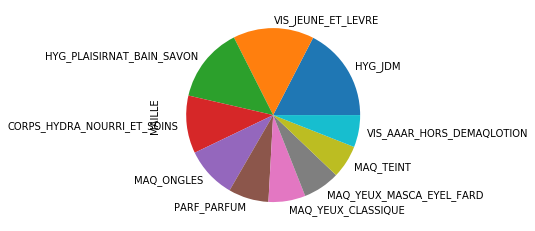

In [119]:
print(df.shape, df.dtypes)

# Manipulation du DF pour constater quelles sont les mailles, univers, familles que l'on retrouve le plus
print(df['FAMILLE'].value_counts())
pd.crosstab(df['UNIVERS'], df['MAILLE'], dropna=True)

#pd.value_counts(df['UNIVERS'])[:10].plot.pie()
# Conclusion de la ligne du dessus, un univers est largement devant les autres, donc logiquement,
# plusieurs mailles devraient l'etre devant les mailles d'un autre Univers

#sns.displot(df['MAILLE'][:10], label='Maille')
pd.value_counts(df['MAILLE'])[:10].plot.pie()

In [120]:
small_df.corr()['PRIX_NET']
#sns.clustermap(df['UNIVERS'][:10].corr())
#sns.pairplot(df['UNIVERS'])

TICKET_ID    -0.037016
MOIS_VENTE   -0.034764
PRIX_NET      1.000000
CLI_ID       -0.035777
Name: PRIX_NET, dtype: float64

In [121]:
encoder = LabelEncoder()
small_df['UNIVERS_NUM'] = encoder.fit_transform(small_df['UNIVERS'])
small_df['PRIX_NET'].corr(small_df['UNIVERS_NUM'])

0.26043135683646707

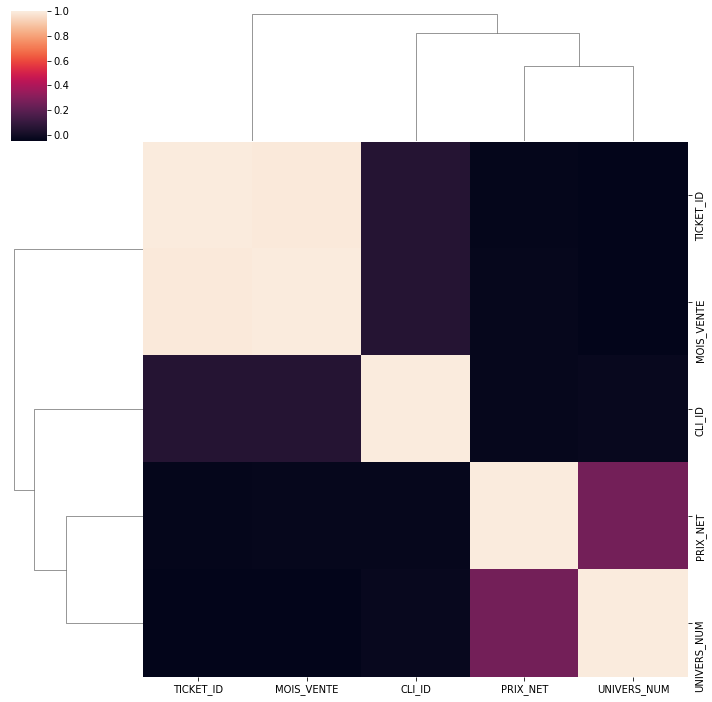

In [122]:
sns.clustermap(small_df[small_df.columns].corr())

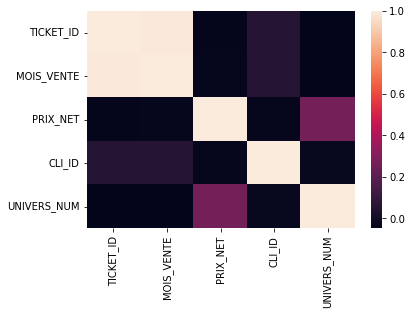

In [123]:
sns.heatmap(small_df[small_df.columns].corr())

In [124]:
#Calcul des clients les plus dépensiers par mois et observation des univers les plus récurrents
months = [month for month in range(1, 13)]
top_clients_df = small_df.copy()

for month in months:
    res = top_clients_df[top_clients_df["MOIS_VENTE"] == month]
    res = res[["MOIS_VENTE", "PRIX_NET", "CLI_ID", "UNIVERS"]]
    # print(res)
    most_recurrent_universes = res[["UNIVERS"]].value_counts()
    # print("UNIVERS most reccurent : ")
    # sns.countplot(data=small_df, x="UNIVERS", order=most_recurrent_universes.index)
    clients = res.groupby("CLI_ID")["PRIX_NET"]\
        .sum().sort_values(ascending=False)
    # print("Month : ", month, "\n")
    # print(clients.head(20), "\n")


In [125]:
# Calcul des mailles les plus onéreuses afin de les proposer aux clients les plus dépensiers
top_mailles = []
for month in months:
    top_expensive = small_df.copy()
    top_expensive = top_expensive[top_expensive["MOIS_VENTE"] == month]
    top_expensive = top_expensive[["MAILLE", "PRIX_NET"]]\
        .groupby("MAILLE")['PRIX_NET'].mean().sort_values(ascending=False)
    print(top_expensive)
    mailles = top_expensive.index.tolist()
    # print("Month : ", month, '\n')
    # print(top_expensive.head(20), '\n')
    for maille in mailles:
        top_mailles.append(maille)
counter = collections.Counter(top_mailles)

# Conclusion -> avec le counter ci-dessus on observe les mailles onéreuses que l'on retrouve pour la
# plupart chaque mois

MAILLE
PARF_PARFUM                    16.287199
PARF_HOMME                     15.231901
DIETETIQUE                     14.950000
VIS_AAAR_HORS_DEMAQLOTION      14.948817
MAQ_AUTRE                      12.553446
MAQ_YEUX_MASCA_HG              10.125139
CORPS_SPA_ET_MINCEUR            9.377078
MAQ_TEINT                       8.651690
VIS_BIO                         7.576443
SOLAIRE                         7.538339
MAQ_YEUX_MASCA_EYEL_FARD        7.336891
MAQ_LEV_RAL_HMG                 7.017906
CORPS_MONOI                     6.253680
VIS_AAAR_DEMAQLOTION            5.964277
VIS_HOMMES                      5.894716
PARF_EDT                        5.578628
HYG_PARFUMEE                    5.524059
CAPILLAIRE_AUTRE                4.686499
CORPS_HYDRA_NOURRI_ET_SOINS     4.385843
MAQ_LEV_BASPRIX                 4.304937
CORPS_HYDR_LAIT_HUILE           4.288935
MAQ_YEUX_CLASSIQUE              4.263171
HYG_HOMME                       4.250896
VIS_AUTRES                      4.005125
VIS_JEUNE

In [126]:
# Parmi le top des mailles , quels sont les libéllés que l'on retrouve le plus chez chacun

#mailles_np_list = np.array(c for c in counter.keys())
top_libelles_par_mailles = {}
libelles_df = small_df.copy()
for key in counter.keys():
    lbl_list = []
    df_lbl = libelles_df[libelles_df["MAILLE"] == key]
    top_lbl = df_lbl.value_counts().head(10)
    for x in range(0, top_lbl.shape[0]):
        lbl_list.append(top_lbl.index[x][6])
        top_libelles_par_mailles[key] = lbl_list

In [131]:
# En choisissant un cli_id, on lui recommande les libelles qu'il ne possède pas d'une maille
# Le libelle proposé fait partie des plus vendus chez cette maille

cli_id = 1490281
maille = 'HYG_JDM'

cli_id_df = small_df.copy()
cli_id_df = cli_id_df[(cli_id_df['CLI_ID'] == cli_id) & (cli_id_df['MAILLE'] == maille)]
# encoder = LabelEncoder()
# cli_id_df['MAILLE_NUM'] = encoder.fit_transform(cli_id_df['MAILLE'])
cli_id_libelles = cli_id_df['LIBELLE'].tolist()
cli_id_libelles = set(cli_id_libelles)
print('Products the client bought : ' , cli_id_libelles)
print("Top products for this maille : ", set(top_libelles_par_mailles[maille]))
print('Recommended products : ', set(top_libelles_par_mailles[maille]).difference(cli_id_libelles))


Products the client bought :  {'GD JDM4 PAMPLEMOUSSE FL 200ML', 'GD JDM4 TIARE FL 200ML'}
Top products for this maille :  {'GD JDM4 TIARE FL 200ML', 'GD JDM4 GRENADE FL200ML', 'GD JDM4 LOTUS FL200ML', 'CD JDM4 RIZ VIOLET FL200 ML', 'GD JDM4 PAMPLEMOUSSE FL 200ML', 'GD JDM4 ORANGE FL 200ML', 'CD JDM4 MAGNOLIA FL 200ML', 'CD JDM4 COTON  FL 200ML', 'GD JDM4 CIT VERT FL 200ML'}
Recommended products :  {'GD JDM4 GRENADE FL200ML', 'GD JDM4 LOTUS FL200ML', 'CD JDM4 RIZ VIOLET FL200 ML', 'GD JDM4 ORANGE FL 200ML', 'CD JDM4 MAGNOLIA FL 200ML', 'CD JDM4 COTON  FL 200ML', 'GD JDM4 CIT VERT FL 200ML'}
